In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from matplotlib import rcParams
from numpy import mean
from numpy import std
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('./Churn_Modeling_Cleaned', sep=',')
df.drop('Unnamed: 0', axis=1, inplace= True)
df.drop('Geography', axis=1, inplace= True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,-0.004426,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,1,-0.373958,1.724464,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,-0.278604,0.687130,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,0.293517,-0.695982,-0.022608,2,1,0,-0.125231,1


In [5]:
X = df.drop('Exited', axis=1)
y= df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size = 0.8, random_state=30)

# Keras Deep Learning 

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], kernel_initializer='uniform',activation="relu" ))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="relu"))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
model.add(Flatten())
model.compile(metrics = ['accuracy'], loss = 'binary_crossentropy' )

In [9]:
model.fit(X_train, y_train, verbose=1, epochs=150, batch_size=64 )

Epoch 1/150


2022-08-10 19:30:29.606724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 8ms/step - loss: 0.5265 - accuracy: 0.7990
Epoch 2/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4432 - accuracy: 0.7999
Epoch 3/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4349 - accuracy: 0.7999
Epoch 4/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4318 - accuracy: 0.7999
Epoch 5/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4318 - accuracy: 0.7999
Epoch 6/150
125/125 [==============================] - 1s 7ms/step - loss: 0.4281 - accuracy: 0.8000
Epoch 7/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4258 - accuracy: 0.8060
Epoch 8/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4239 - accuracy: 0.8160
Epoch 9/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4206 - accuracy: 0.8224
Epoch 10/150
125/125 [==============================] - 1s 8ms/step - loss: 0.4164 - accuracy: 0.8295
E

In [6]:
y_pred = model.predict(X_test)
rounded = y_pred.round()

print("Accuracy:",metrics.accuracy_score(y_test, rounded))
print("Precision:",metrics.precision_score(y_test, rounded))
print("Recall:",metrics.recall_score(y_test, rounded))


63/63 [==============================] - 0s 2ms/step
Accuracy: 0.8385
Precision: 0.6423173803526449
Recall: 0.5848623853211009


2022-08-10 19:29:18.810859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


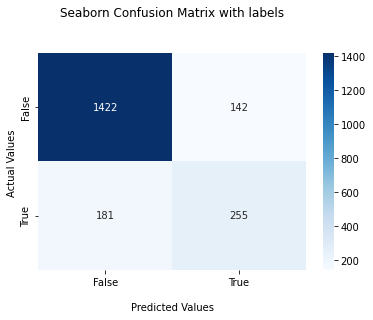

In [7]:
cf_matrix = confusion_matrix(y_test, rounded)
cf_matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
model.save('./Models/Keras_Churn_'+str(metrics.accuracy_score(y_test, rounded))+'_'+str(f1_score(y_test, y_pred)))

# Load Best Model

In [16]:
model_best = keras.models.load_model('./Models/Keras_Churn_084_062')

In [17]:
y_pred = model_best.predict(X_test)

63/63 [==============================] - 0s 2ms/step


2022-08-12 08:08:55.780695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
rounded = y_pred > 0.3
print("Accuracy:",metrics.accuracy_score(y_test, rounded))
print("Precision:",metrics.precision_score(y_test, rounded))
print("Recall:",metrics.recall_score(y_test, rounded))

Accuracy: 0.655
Precision: 0.3764591439688716
Recall: 0.8876146788990825


In [11]:
y_pred = model_best.predict(X_test)
rounded = y_pred.round()

print("Accuracy:",metrics.accuracy_score(y_test, rounded))
print("Precision:",metrics.precision_score(y_test, rounded))
print("Recall:",metrics.recall_score(y_test, rounded))

63/63 [==============================] - 0s 2ms/step
Accuracy: 0.8445
Precision: 0.6631853785900783
Recall: 0.5825688073394495


2022-08-10 22:03:05.487576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


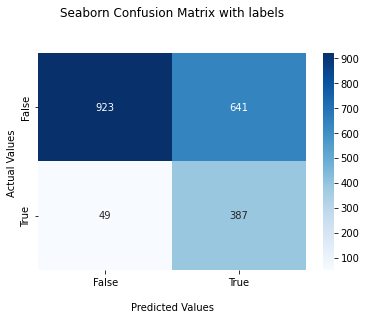

In [26]:
cf_matrix = confusion_matrix(y_test, rounded)
cf_matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Histogram of Exit Score

(array([386., 233., 353., 391., 254., 160.,  82.,  13.,  39.,  89.]),
 array([2.0793101e-07, 9.9999987e-02, 1.9999976e-01, 2.9999954e-01,
        3.9999932e-01, 4.9999908e-01, 5.9999889e-01, 6.9999862e-01,
        7.9999840e-01, 8.9999819e-01, 9.9999797e-01], dtype=float32),
 <BarContainer object of 10 artists>)

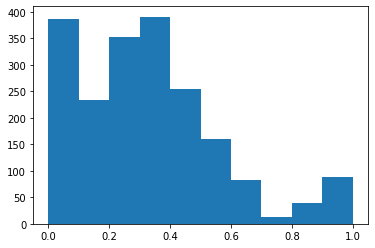

In [14]:
df_pred = pd.DataFrame(y_pred,columns=['Chun_Score'])
plt.hist(df_pred)

# XGBoost Classifier

In [27]:
xgbc = XGBClassifier(eval_metric=mean_absolute_error,learning_rate =0.01,
 n_estimators=2000,
 max_depth=17,
 min_child_weight=12,
 gamma=0,
 subsample=0.5,)

In [28]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=<function mean_absolute_error at 0x17fdd16c0>,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=17, max_leaves=0,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [29]:
y_pred = xgbc.predict(X_test)

In [143]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",f1_score(y_test, y_pred))

Accuracy: 0.8485
Precision: 0.734982332155477
Recall: 0.47706422018348627
F1: 0.5785813630041724


In [ ]:
y_pred[y_pred['']]

In [ ]:
df_pred = pd.DataFrame(y_pred, columns=['pred'])
df.iloc[df_pred[df_pred['pred'] == 1].iloc]

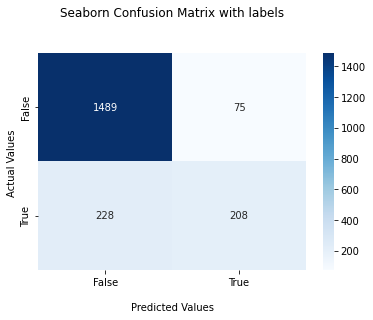

In [144]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# F1 Depth Optimizer

In [ ]:
best_f1 = 0
best_depth = 0

for i in range(15,50,2):
    xgbc = XGBClassifier(eval_metric=mean_absolute_error,learning_rate =0.01,
    n_estimators=2000,
    max_depth=i,
    min_child_weight=12,
    gamma=0,
    subsample=0.5,)
    xgbc.fit(X_train, y_train)
    y_pred = xgbc.predict(X_test)
    x = f1_score(y_test, y_pred)
    if x > best_f1:
        best_f1 = x
        best_depth = i
print('Best f1:' + str(best_f1) + 'best depth:' + str(best_depth))

# XGBC Feature Importance

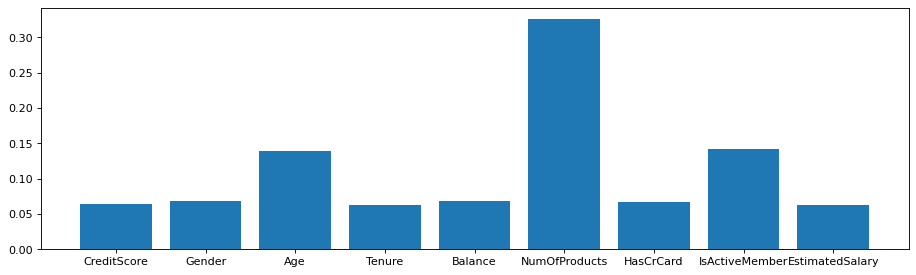

In [157]:
from matplotlib.pyplot import figure
figure(figsize=(14, 4), dpi=80)
plt.bar(X_train.columns,xgbc.feature_importances_)
plt.show()